In [4]:
## import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
from pylab import rcParams
import numpy as np
import seaborn as sns
import os

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV
from sklearn.feature_selection import RFECV, SelectFromModel, SelectKBest
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
%matplotlib inline

In [5]:
df_Gempa = pd.read_csv('/workspaces/147965930/project/final/data34y.csv',  index_col=0)
df_Gempa = df_Gempa.rename(columns={'Close(t)':'Close'})
df_Gempa.head()

,Date,Latitude,Longitude,Depth,Mag
Year,,,,,
1990,1990-01-11,-5.006,102.429,33.0,4.8
1990,1990-03-02,-5.267,102.85,33.0,4.8
1990,1990-03-26,-5.236,102.52,34.1,5.0
1990,1990-04-16,-5.301,102.38,38.9,4.9
1990,1990-05-02,-4.238,103.049,33.0,4.4


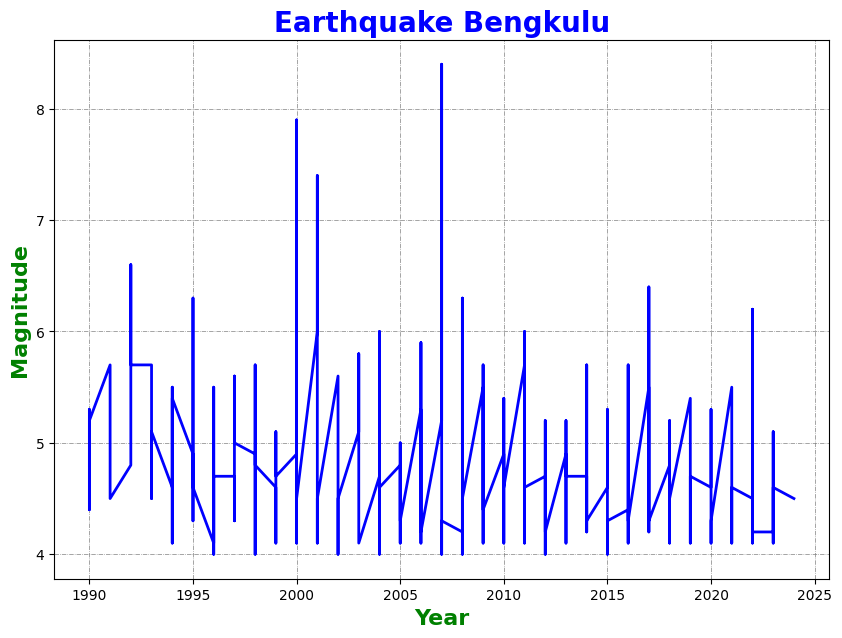

In [12]:
# Plot data
df_Gempa['Mag'].plot(figsize=(10, 7), color='blue', linestyle='-', linewidth=2)

# Set judul, label sumbu, dan ukuran font
plt.title("Earthquake Bengkulu", fontsize=20, fontweight='bold', color='blue')
plt.ylabel('Magnitude', fontsize=16, fontweight='bold', color='green')
plt.xlabel('Year', fontsize=16, fontweight='bold', color='green')

# Set grid dengan gaya dan warna tertentu
plt.grid(which="major", color='gray', linestyle='-.', linewidth=0.5)

# Menampilkan plot
plt.show()

In [14]:
## remove unnecessary columns
df_Gempa = df_Gempa.drop(columns= {'Date'})

In [15]:
## train-test split
def create_train_test_set(df_Gempa):

    features = df_Gempa.drop(columns=['Mag'], axis=1)
    target = df_Gempa['Mag']


    data_len = df_Gempa.shape[0]
    print('Historical Gempa Data length is - ', str(data_len))

    #create a chronological split for train and testing
    train_split = int(data_len * 0.88)
    print('Training Set length - ', str(train_split))

    val_split = train_split + int(data_len * 0.1)
    print('Validation Set length - ', str(int(data_len * 0.1)))

    print('Test Set length - ', str(int(data_len * 0.02)))

    # Splitting features and target into train, validation and test samples
    X_train, X_val, X_test = features[:train_split], features[train_split:val_split], features[val_split:]
    Y_train, Y_val, Y_test = target[:train_split], target[train_split:val_split], target[val_split:]

    #print shape of samples
    print(X_train.shape, X_val.shape, X_test.shape)
    print(Y_train.shape, Y_val.shape, Y_test.shape)

    return X_train, X_val, X_test, Y_train, Y_val, Y_test

In [16]:
X_train, X_val, X_test, Y_train, Y_val, Y_test = create_train_test_set(df_Gempa)

Historical Gempa Data length is -  1179
Training Set length -  1037
Validation Set length -  117
Test Set length -  23
(1037, 2) (117, 2) (25, 2)
(1037,) (117,) (25,)


In [17]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, Y_train)

LinearRegression()

In [18]:
Y_train_pred = lr.predict(X_train)
Y_val_pred = lr.predict(X_val)
Y_test_pred = lr.predict(X_test)

In [19]:
df_pred = pd.DataFrame(Y_val.values, columns=['Actual'], index=Y_val.index)
df_pred['Predicted'] = Y_val_pred
df_pred = df_pred.reset_index()
df_pred.loc[:, 'Year'] = pd.to_datetime(df_pred['Year'],format='%Y')
df_pred

,Year,Actual,Predicted
0,2018-01-01,4.5,4.618977
1,2018-01-01,4.8,4.604677
2,2018-01-01,5.2,4.621650
3,2018-01-01,4.9,4.610296
4,2018-01-01,4.5,4.641127
...,...,...,...
112,2022-01-01,4.5,4.530062
113,2022-01-01,4.9,4.792355
114,2022-01-01,4.6,4.537387
115,2022-01-01,5.1,4.518255


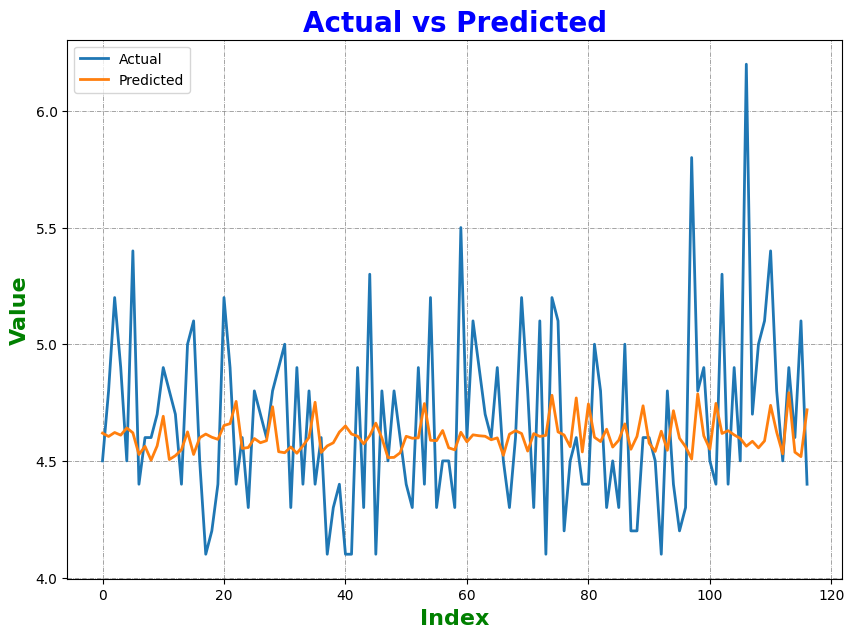

In [21]:
# Plot data
df_pred[['Actual', 'Predicted']].plot(figsize=(10, 7), linewidth=2)

# Set judul, label sumbu, dan ukuran font
plt.title("Actual vs Predicted", fontsize=20, fontweight='bold', color='blue')
plt.ylabel('Value', fontsize=16, fontweight='bold', color='green')
plt.xlabel('Index', fontsize=16, fontweight='bold', color='green')

# Set grid dengan gaya dan warna tertentu
plt.grid(which="major", color='gray', linestyle='-.', linewidth=0.5)

# Menampilkan plot
plt.show()